<a href="https://colab.research.google.com/github/GoryachevDaniil/UAI_AI_project_intro/blob/main/%D0%93%D0%BE%D1%80%D1%8F%D1%87%D0%B5%D0%B2_%D0%94_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%7C_%D0%94%D0%97_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential 
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense 
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam 
# Подключение утилит для to_categorical
from tensorflow.keras import utils 
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image 
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
from PIL import Image 
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

replace hw_pro/0/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [ ]:
x_trn = x_train.reshape(x_train.shape[0], -1)   

x_trn.shape

(102, 400)

In [ ]:
x_trn = x_trn.astype('float32') / 255.

In [ ]:
CLASS_COUNT = 2

In [ ]:
y_trn = utils.to_categorical(y_train, CLASS_COUNT)

In [ ]:
y_trn.shape

(102, 2)

In [ ]:
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu')) 
model.add(Dense(400, input_dim=200, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax')) 

In [ ]:
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 800)               320800    
                                                                 
 dense_156 (Dense)           (None, 400)               320400    
                                                                 
 dense_157 (Dense)           (None, 2)                 802       
                                                                 
Total params: 642,002
Trainable params: 642,002
Non-trainable params: 0
_________________________________________________________________
None


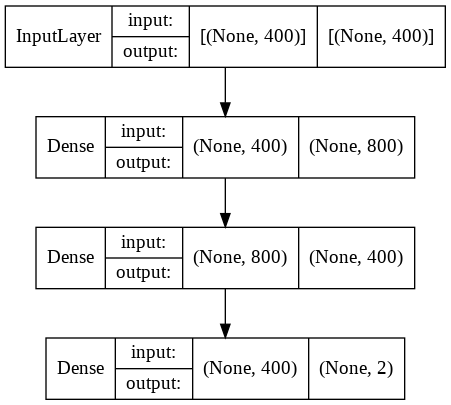

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.fit(x_trn,
          y_trn,
          batch_size=128,
          epochs=12,
          verbose=1)

Epoch 1/12
1/1 [==============================] - 0s 320ms/step - loss: 0.2975 - accuracy: 0.5098
Epoch 2/12
1/1 [==============================] - 0s 15ms/step - loss: 0.2632 - accuracy: 0.4902
Epoch 3/12
1/1 [==============================] - 0s 10ms/step - loss: 0.2435 - accuracy: 0.5980
Epoch 4/12
1/1 [==============================] - 0s 14ms/step - loss: 0.2225 - accuracy: 0.6961
Epoch 5/12
1/1 [==============================] - 0s 14ms/step - loss: 0.2045 - accuracy: 0.8529
Epoch 6/12
1/1 [==============================] - 0s 10ms/step - loss: 0.1872 - accuracy: 0.9118
Epoch 7/12
1/1 [==============================] - 0s 9ms/step - loss: 0.1704 - accuracy: 0.9510
Epoch 8/12
1/1 [==============================] - 0s 8ms/step - loss: 0.1543 - accuracy: 0.9706
Epoch 9/12
1/1 [==============================] - 0s 7ms/step - loss: 0.1392 - accuracy: 0.9706
Epoch 10/12
1/1 [==============================] - 0s 9ms/step - loss: 0.1254 - accuracy: 0.9706
Epoch 11/12
1/1 [===============

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')